# OpenAlex API in Python

by Michael T. Moen

Please see the following resources for more information on API usage:

- Documentation
    - <a href="https://openalex.org/" target="_blank">OpenAlex</a>
    - <a href="https://docs.openalex.org/" target="_blank">OpenAlex API Documentation</a>
- Terms
    - <a href="https://openalex.org/OpenAlex_termsofservice.pdf" target="_blank">OpenAlex Terms of Service</a>
- Data Reuse
    - <a href="https://docs.openalex.org/additional-help/faq#how-is-openalex-licensed" target="_blank">OpenAlex License</a>: "OpenAlex data is licensed as <a href="https://creativecommons.org/publicdomain/zero/1.0/" target="_blank">CC0</a> so it is free to use and distribute.

**_NOTE:_** The OpenAlex API limits requests to a maximum of 100,000 per user per day and 10 requests per second.

*These recipe examples were tested on May 6, 2025.*

## Setup

### Import Libraries

The following external libraries need to be installed into your environment to run the code examples in this tutorial:

- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/psf/requests" target="_blank">requests</a>
- <a href="https://github.com/theskumar/python-dotenv" target="_blank">python-dotenv</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [2]:
import requests
import matplotlib.pyplot as plt
from time import sleep
from collections import Counter
from dotenv import load_dotenv
import os

### Import User Information

An API key is not required to access the OpenAlex API. However, it is recommended that you add your email to all API requests. Doing so will provide much faster and much more consistent response times.

We keep our email in a `.env` file and use the `dotenv` library to access it. If you would like to use this method, create a `.env` file and add the following line to it:

```text
EMAIL="example@domain.com"
```

In [3]:
load_dotenv()
try:
    EMAIL = os.environ["EMAIL"]
except KeyError:
    print("Email not found. Please set 'EMAIL' in your .env file.")

### OpenAlex Snapshot

OpenAlex also offers a database download that is updated monthly. This option may be more useful than the API when working with larger datasets and when up-to-date data is unimportant.

More information can be found <a href="https://docs.openalex.org/download-all-data/openalex-snapshot" target="_blank">here</a>.

## 1. Simple Queries

The OpenAlex API has a `works` endpoint that can be used to search for works using a query. In this example, we'll consider several different queries. More information on search queries can be found <a href="https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/search-entities" target="_blank">here</a>.

### Simple Title Query

This first example will search for the term "geodetics":

In [ ]:
BASE_URL = 'https://api.openalex.org/'
endpoint = 'works'
filters = 'title.search:"geodetics"'
params = {
    'filter': filters,
    'mailto': EMAIL
}
geodetics_data = requests.get(BASE_URL + endpoint, params=params).json()

# Display resulting metadata
geodetics_data['meta']

{'count': 13150,
 'db_response_time_ms': 81,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

The 'count' in the output above tells us how many works have been published by UA authors.

It's also important to note that the data returned by this API request is just the first page of size 25. That means that in order to obtain the data for all works in `data_retrieved['results']`, we must page through this data.

Each work obtained in the query will have the following structure:

In [5]:
geodetics_data['results'][0]

{'id': 'https://openalex.org/W2095673763',
 'doi': 'https://doi.org/10.1007/bf00989270',
 'title': 'Geodetic Reference System 1980',
 'display_name': 'Geodetic Reference System 1980',
 'relevance_score': 367.76678,
 'publication_year': 1992,
 'publication_date': '1992-01-01',
 'ids': {'openalex': 'https://openalex.org/W2095673763',
  'doi': 'https://doi.org/10.1007/bf00989270',
  'mag': '2095673763'},
 'language': 'en',
 'primary_location': {'is_oa': False,
  'landing_page_url': 'https://doi.org/10.1007/bf00989270',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S4210224534',
   'display_name': 'Bulletin Géodésique',
   'issn_l': '0007-4632',
   'issn': ['0007-4632'],
   'is_oa': False,
   'is_in_doaj': False,
   'is_indexed_in_scopus': False,
   'is_core': False,
   'host_organization': 'https://openalex.org/P4310319965',
   'host_organization_name': 'Springer Nature',
   'host_organization_lineage': ['https://openalex.org/P4310319965'],
   'host_organization_lineage_name

### Index Out Query Results

Now that we've obtained some data from the API, we can index out some of data from this query:

In [ ]:
# Display the DOI of the second work returned
geodetics_data['results'][1]['doi']

'https://doi.org/10.1002/2014gc005407'

In [ ]:
# Display the title of the second work returned
geodetics_data['results'][1]['title']

'A geodetic plate motion and Global Strain Rate Model'

In [ ]:
# Display the primary institution of the first author of the second work returned
geodetics_data['results'][1]['authorships'][0]['institutions'][0]['display_name']

'University of Nevada, Reno'

In [12]:
# Display titles of first 10 results
for work in geodetics_data['results'][:10]:
    print(work['title'])

Geodetic Reference System 1980
A geodetic plate motion and Global Strain Rate Model
A testing procedure for use in geodetic networks
Geodetic determination of relative plate motion in central California
Inertial Navigation Systems with Geodetic Applications
Effect of annual signals on geodetic velocity
Short Note: A global model of pressure and temperature for geodetic applications
Geodetic Reference System 1980
Density assumptions for converting geodetic glacier volume change to mass change
Geodetic reference system 1980


### Query with Boolean Logic

The API also allows us to use boolean operators AND, OR, and NOT (must be capitalized) when querying for works. This example searches for works whose abstracts contain "simulation" and "chemistry" and not "medicine" or "energy":

In [ ]:
endpoint = 'works'
filters = 'abstract.search:("simulation" AND "chemistry") NOT ("medicine" OR "energy")'
params = {
    'filter': filters,
    'mailto': EMAIL
}
data = requests.get(BASE_URL + endpoint, params=params).json()

# Display resulting metadata
data['meta']

{'count': 26750,
 'db_response_time_ms': 89,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

## 2. Retrieve Publications from an Institution

The OpenAlex API provides several ways to find the works published through an institution. In this tutorial, we'll look at how to achieve this by searching with an ROR ID and an OpenAlex ID.

### Search Using an ROR Identifier

The OpenAlex API allows us to access the publications from an institution through its ROR ID. To find the ROR ID for an institution, we can search for the institution <a href="https://ror.org/" target="_blank">here</a>.

*To see how to programmatically obtain ROR IDs for institutions, please see our <a href="https://ua-libraries-research-data-services.github.io/UALIB_ScholarlyAPI_Cookbook/src/overview/ror.html" target="_blank">Research Organization Registry cookbook tutorials</a>.*

In this example, we'll look at the University of Alabama, which has the ROR identifier of <a href="https://ror.org/03xrrjk67" target="_blank">https://ror.org/03xrrjk67</a>.

In [14]:
ua_ror = 'https://ror.org/03xrrjk67'
endpoint = 'works'
filters = f'institutions.ror:{ua_ror}'
params = {
    'filter': filters,
    'mailto': EMAIL
}
ua_data = requests.get(BASE_URL + endpoint, params=params).json()

# Display length of data and other info
ua_data['meta']

{'count': 67125,
 'db_response_time_ms': 112,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

### Search Using an OpenAlex ID

To find the OpenAlex ID of an institution, we'll first perform an institution search:

In [15]:
endpoint = 'institutions'
search = 'University of Alabama'
params = {
    'search': search,
    'mailto': EMAIL
}
institutions_search_results = requests.get(BASE_URL + endpoint, params=params).json()

# Display resulting metadata
institutions_search_results['meta']

{'count': 11,
 'db_response_time_ms': 35,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

In [16]:
institutions_search_results['results'][0]

{'id': 'https://openalex.org/I32389192',
 'ror': 'https://ror.org/008s83205',
 'display_name': 'University of Alabama at Birmingham',
 'relevance_score': 111419.7,
 'country_code': 'US',
 'type': 'funder',
 'type_id': 'https://openalex.org/institution-types/funder',
 'lineage': ['https://openalex.org/I32389192'],
 'homepage_url': 'https://www.uab.edu',
 'image_url': 'https://commons.wikimedia.org/w/index.php?title=Special:Redirect/file/UABirmingham%20logo.png',
 'image_thumbnail_url': 'https://commons.wikimedia.org/w/index.php?title=Special:Redirect/file/UABirmingham%20logo.png&width=300',
 'display_name_acronyms': ['UAB'],
 'display_name_alternatives': ["Université d'alabama à birmingham"],
 'repositories': [],
 'works_count': 136892,
 'cited_by_count': 5318657,
 'summary_stats': {'2yr_mean_citedness': 3.9929190751445085,
  'h_index': 663,
  'i10_index': 66083},
 'ids': {'openalex': 'https://openalex.org/I32389192',
  'ror': 'https://ror.org/008s83205',
  'mag': '32389192',
  'grid': 

This query returned several universities related to the "University of Alabama":

In [17]:
for institution in institutions_search_results['results']:
    print(f"{institution['display_name']}: {institution['id']}")

University of Alabama at Birmingham: https://openalex.org/I32389192
University of Alabama: https://openalex.org/I17301866
University of Alabama in Huntsville: https://openalex.org/I82495205
University of South Alabama: https://openalex.org/I83809506
University of Alabama at Birmingham Hospital: https://openalex.org/I1335695989
University of Alabama System: https://openalex.org/I2800507078
University of North Alabama: https://openalex.org/I12970578
University of South Alabama Medical Center: https://openalex.org/I4210151789
University of West Alabama: https://openalex.org/I68631920
UAB Medicine: https://openalex.org/I4390039250
Amridge University: https://openalex.org/I2800517358


As we can see above, the OpenAlex ID for the University of Alabama is "<a href="https://openalex.org/I17301866" target="_blank">https://openalex.org/I17301866</a>" or just "I17301866"

In [19]:
ua_openalex_id = 'I17301866'
endpoint = 'works'
filters = f'institutions.id:{ua_openalex_id}'
params = {
    'filter': filters,
    'mailto': EMAIL
}
ua_data = requests.get(BASE_URL + endpoint, params=params).json()

# Display resulting metadata
ua_data['meta']

{'count': 67125,
 'db_response_time_ms': 179,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

As we can see from the `count` in the metadata, these two approaches found the same number of publications.

## 3. Page through the Results of a Query

In the examples above, we have only retrieved the first page of results for a query. If we wish to obtain all of the data for an institution, we must page through the results. Paging is used in the example below to obtain all of the publications by UA in the OpenAlex database:

In [20]:
# Parameters for obtaining UA publications
endpoint = 'works'
filters = 'institutions.id:I17301866'

# The cursor to the next page is given in the metadata of the response
# To get the first page, we set the cursor parameter to '*'
cursor = '*'
page_size = 200

ua_articles = []

# When the end of the results has been reached, the 'next_cursor' variable will be null
# This while loop iterates through all pages of the results
while cursor is not None:
    params = {
        'filter': filters,
        'cursor': cursor,
        'per-page': page_size,
        'mailto': EMAIL
    }
    page_data = requests.get(BASE_URL + endpoint, params=params).json()

    # Set cursor to the next page
    cursor = page_data['meta']['next_cursor']
    
    # Add results to the ua_articles list
    ua_articles.extend(page_data['results'])
    
    # Wait 0.2 seconds between requests to follow OpenAlex's rate limit
    sleep(0.2)

# Display number of UA articles in database
len(ua_articles)

67125

### Plot UA Publications by Year

This example plots the number of UA publications per year from 1970 onward:

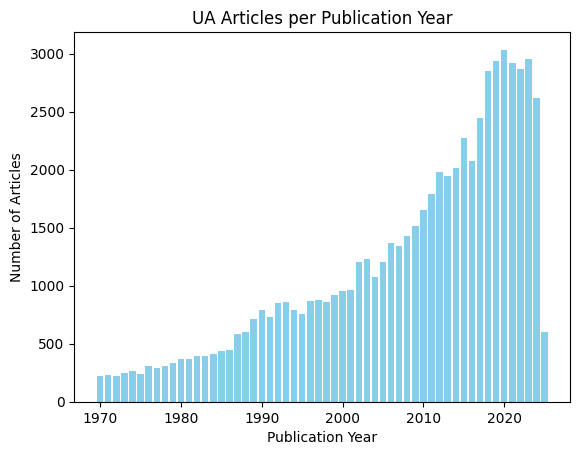

In [21]:
# Extract publication years
publication_years = []
for article in ua_articles:
    if article['publication_year'] >= 1970:
        publication_years.append(article['publication_year'])

# Count occurrences of each publication year
year_counts = Counter(publication_years)

# Plot data
years = list(year_counts.keys())
counts = list(year_counts.values())

plt.bar(years, counts, color='skyblue')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('UA Articles per Publication Year')
plt.show()

### Plot Open Access UA Publications

*Inspired by: <a href="https://github.com/ourresearch/openalex-api-tutorials/blob/main/notebooks/institutions/oa-percentage.ipynb" target="_blank">https://github.com/ourresearch/openalex-api-tutorials/blob/main/notebooks/institutions/oa-percentage.ipynb</a>*

This example plots the prevalence open access in UA articles from 2000 onward:

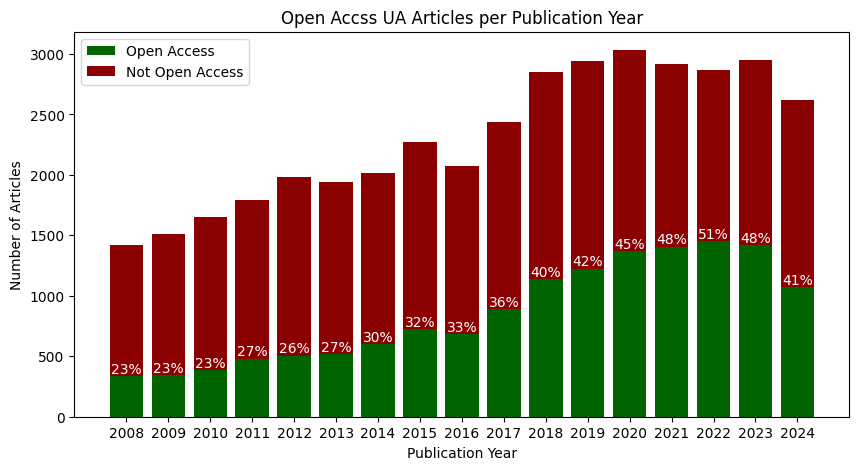

In [27]:
# Extract publication years and 'is_open' values
year_oa = [(art['publication_year'], art['open_access']['is_oa']) for art in ua_articles]

# Filter to include only years after 1999
filtered_data = [(year, is_open) for year, is_open in year_oa if 2008 <= year <= 2024]

# Count occurrences of (year, is_open)
count_per_year_is_open = Counter(filtered_data)

# Plot data
years = sorted(set(year for year, _ in filtered_data))
open_access_counts = [count_per_year_is_open[(year, True)] for year in years]
not_open_access_counts = [count_per_year_is_open[(year, False)] for year in years]

# Compute and add percentages
percent_oa = []
for oa,not_oa in zip(open_access_counts,not_open_access_counts):
    percent_oa.append(round((oa/(oa + not_oa)*100)))

# Plot with percentage labels
fig, ax = plt.subplots(figsize=(10, 5))
bars = plt.bar(years, open_access_counts, color='darkgreen', label='Open Access')

# Add labels above bars
for bar, percent in zip(bars, percent_oa):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percent}%', ha='center', va='bottom',
            color='white', fontsize=10)

plt.bar(years, not_open_access_counts, bottom=open_access_counts, color='darkred',
        label='Not Open Access')

plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('Open Accss UA Articles per Publication Year')
plt.legend(loc='upper left')
ax.set_xticks(years)
plt.show()

## 4. Searching for Authors

You can search for authors in OpenAlex using external IDs or OpenAlex IDs. The external IDs that are supported at the time of writing are ORCID, Scopus, Twitter, and Wikipedia.

### Using ORCID IDs

You can find the ORCID ID of an author by searching <a href="https://orcid.org/" target="_blank">here</a>. In this example, we'll use the ORCID ID for Dr. Vincent F. Scalfani: <a href="https://orcid.org/0000-0002-7363-531X" target="_blank">https://orcid.org/0000-0002-7363-531X</a>.

In [29]:
endpoint = 'authors'
orcid_id = 'https://orcid.org/0000-0002-7363-531X'

url = f'https://api.openalex.org/{endpoint}/{orcid_id}?mailto={EMAIL}'

author_results = requests.get(url).json()

# Display resulting metadata
author_results

{'id': 'https://openalex.org/A5015603191',
 'orcid': 'https://orcid.org/0000-0002-7363-531X',
 'display_name': 'Vincent F. Scalfani',
 'display_name_alternatives': ['Vincent F. Scalfani',
  'Vincent Scalfani',
  'Scalfani Vincent F.',
  'Vin Scalfani, V. F. Scalfani'],
 'works_count': 174,
 'cited_by_count': 597,
 'summary_stats': {'2yr_mean_citedness': 7.5, 'h_index': 14, 'i10_index': 14},
 'ids': {'openalex': 'https://openalex.org/A5015603191',
  'orcid': 'https://orcid.org/0000-0002-7363-531X',
  'scopus': 'http://www.scopus.com/inward/authorDetails.url?authorID=55764087400&partnerID=MN8TOARS'},
 'affiliations': [{'institution': {'id': 'https://openalex.org/I17301866',
    'ror': 'https://ror.org/03xrrjk67',
    'display_name': 'University of Alabama',
    'country_code': 'US',
    'type': 'funder',
    'lineage': ['https://openalex.org/I17301866']},
   'years': [2023, 2022, 2021, 2018, 2017, 2016, 2015, 2014]},
  {'institution': {'id': 'https://openalex.org/I92446798',
    'ror': '

### Using OpenAlex IDs

We can also use search queries to find the OpenAlex ID of an author. In this example, we'll use 'Michael T. Moen' as our query.

In [31]:
endpoint = 'authors'
query = 'Michael T. Moen'

url = f'https://api.openalex.org/{endpoint}?search={query}&mailto={EMAIL}'

author_results = requests.get(url).json()

# Display resulting metadata
author_results['meta']

{'count': 1,
 'db_response_time_ms': 85,
 'page': 1,
 'per_page': 25,
 'groups_count': None}

We can then obtain the OpenAlex ID in the results:

In [33]:
openalex_id = author_results['results'][0]['id']
openalex_id

'https://openalex.org/A5093011452'

Now, we can use this OpenAlex ID to obtain the data associated with the author:

In [35]:
endpoint = 'authors'

url = f'https://api.openalex.org/{endpoint}/{openalex_id}?mailto={EMAIL}'

author_results = requests.get(url).json()

# Display resulting metadata
author_results

{'id': 'https://openalex.org/A5093011452',
 'orcid': 'https://orcid.org/0009-0002-3683-9791',
 'display_name': 'Michael T. Moen',
 'display_name_alternatives': ['Michael T. Moen'],
 'works_count': 1,
 'cited_by_count': 2,
 'summary_stats': {'2yr_mean_citedness': 2.0, 'h_index': 1, 'i10_index': 0},
 'ids': {'openalex': 'https://openalex.org/A5093011452',
  'orcid': 'https://orcid.org/0009-0002-3683-9791'},
 'affiliations': [{'institution': {'id': 'https://openalex.org/I17301866',
    'ror': 'https://ror.org/03xrrjk67',
    'display_name': 'University of Alabama',
    'country_code': 'US',
    'type': 'funder',
    'lineage': ['https://openalex.org/I17301866']},
   'years': [2023]}],
 'last_known_institutions': [{'id': 'https://openalex.org/I17301866',
   'ror': 'https://ror.org/03xrrjk67',
   'display_name': 'University of Alabama',
   'country_code': 'US',
   'type': 'funder',
   'lineage': ['https://openalex.org/I17301866']}],
 'topics': [{'id': 'https://openalex.org/T11181',
   'disp